<a href="https://colab.research.google.com/github/Bmmmy/AI_CLASS/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CBB110218 陳芷盈

In [ ]:
import pandas as pd
import io

# 取得資料集
df = pd.read_csv("letter_train.csv")
print('資料的形式:{}'.format(df.shape))
print('遺漏的數量:{}'.format(df.isnull().sum().sum()))
df.head()

資料的形式:(10000, 17)
遺漏的數量:0


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,T
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,I
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,D
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,N
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,G


In [ ]:
df["class"].value_counts()

class
T    427
M    410
P    409
Y    408
H    407
U    406
X    399
E    398
B    394
A    393
J    392
D    387
V    382
O    380
F    379
C    378
L    375
N    374
Q    370
K    370
G    367
I    364
R    364
Z    358
S    355
W    354
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(df["class"])
df['class'] = labelencoder.fit_transform(data_le['class'])
#df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-5-f012bfc9c459>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["class"], palette="Set3")


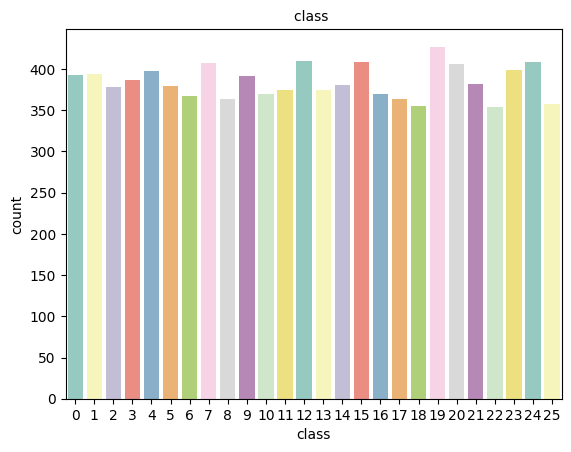

In [ ]:
#印出每一個種類的數量
sns.countplot(x=df["class"], palette="Set3")
plt.title("class ",fontsize=10)
plt.show()

In [ ]:
#從dataframe中取出feature和label
x = df.drop(['class'], axis = 1)
print(x)
y = df.loc[:,'class'].values
print(y)

      x-box  y-box  width  high                                              \
0         2      8      3                                                 5   
1         5     12      3                                                 7   
2         4     11      6                                                 8   
3         7     11      6                                                 6   
4         2      1      3                                                 1   
...     ...    ...    ...                                               ...   
9995      8     11      6                                                 6   
9996      5     11      6                                                 9   
9997      5     11      7                                                 9   
9998      4      9      6                                                 7   
9999      5     10      7                                                 9   

      onpix                                        

In [ ]:
#將feature標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [ ]:
# 設定亂數產生器的起始點(包含Numpy與Tensorflow)
seed = 42
from numpy import random
random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)

In [ ]:
# 載入使用的套件及子套件
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# 將資料集分為訓練資料與測試資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.22, random_state=42)

print(x.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(10000, 16)
(7800, 16)
(2200, 16)
(10000,)
(7800,)
(2200,)


In [ ]:
pd.Series(y).value_counts(normalize=True)

19    0.0427
12    0.0410
15    0.0409
24    0.0408
7     0.0407
20    0.0406
23    0.0399
4     0.0398
1     0.0394
0     0.0393
9     0.0392
3     0.0387
21    0.0382
14    0.0380
5     0.0379
2     0.0378
11    0.0375
13    0.0374
16    0.0370
10    0.0370
6     0.0367
8     0.0364
17    0.0364
25    0.0358
18    0.0355
22    0.0354
Name: proportion, dtype: float64

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

19    0.042692
12    0.041026
15    0.040897
24    0.040769
7     0.040641
20    0.040641
23    0.039872
4     0.039744
1     0.039359
0     0.039359
9     0.039231
3     0.038718
21    0.038205
5     0.037949
14    0.037949
2     0.037821
13    0.037436
11    0.037436
16    0.037051
10    0.037051
6     0.036667
17    0.036410
8     0.036410
25    0.035769
18    0.035513
22    0.035385
Name: proportion, dtype: float64

In [ ]:
# 建構神經網路模型(16-4-2-7)
#改
#128/56/26  0.90718 +15
#128/64/26  0.90718 +30
#128/64/26 0.90718 +20
#128/64/32/26 0.89037 +30
#256/128/56/26 0.90258   +15
#208/104/52/26 0.89677 +15
#512/128/64/26 0.91698 +15
#512/128/64/26 0.90778 +15 -->test_size=0.3 (之前都是0.2)

#256/128/64/26 0.91618 +15 test_size=0.3 relu-->elu
#256/128/64/26 0.91738 +15 test_size=0.3 relu-->elu
model = Sequential()
model.add(Dense(units=128, input_dim=X_train.shape[1],
                kernel_initializer='uniform',
                activation='relu'))
model.add(Dense(units=64,
                kernel_initializer='uniform',
                activation='tanh'))
#輸出26個英文字母
model.add(Dense(units=26,
                kernel_initializer='uniform',
                activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 26)                1690      
                                                                 
Total params: 12122 (47.35 KB)
Trainable params: 12122 (47.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 編譯模型 #adam!
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 訓練模型 #epochs!
#15 / 30 /20 /25
train_history = model.fit(X_train, y_train,
                          epochs=30, #15
                          batch_size=16,
                          verbose=2)

Epoch 1/30
488/488 - 4s - loss: 1.8381 - accuracy: 0.4842 - 4s/epoch - 7ms/step
Epoch 2/30
488/488 - 1s - loss: 0.9880 - accuracy: 0.7140 - 1s/epoch - 3ms/step
Epoch 3/30
488/488 - 1s - loss: 0.7684 - accuracy: 0.7756 - 799ms/epoch - 2ms/step
Epoch 4/30
488/488 - 1s - loss: 0.6262 - accuracy: 0.8201 - 895ms/epoch - 2ms/step
Epoch 5/30
488/488 - 1s - loss: 0.5253 - accuracy: 0.8481 - 821ms/epoch - 2ms/step
Epoch 6/30
488/488 - 1s - loss: 0.4464 - accuracy: 0.8709 - 845ms/epoch - 2ms/step
Epoch 7/30
488/488 - 1s - loss: 0.3848 - accuracy: 0.8894 - 842ms/epoch - 2ms/step
Epoch 8/30
488/488 - 1s - loss: 0.3356 - accuracy: 0.9083 - 931ms/epoch - 2ms/step
Epoch 9/30
488/488 - 1s - loss: 0.2978 - accuracy: 0.9154 - 1s/epoch - 3ms/step
Epoch 10/30
488/488 - 1s - loss: 0.2632 - accuracy: 0.9260 - 1s/epoch - 3ms/step
Epoch 11/30
488/488 - 1s - loss: 0.2351 - accuracy: 0.9318 - 1s/epoch - 2ms/step
Epoch 12/30
488/488 - 1s - loss: 0.2089 - accuracy: 0.9418 - 860ms/epoch - 2ms/step
Epoch 13/30
488/

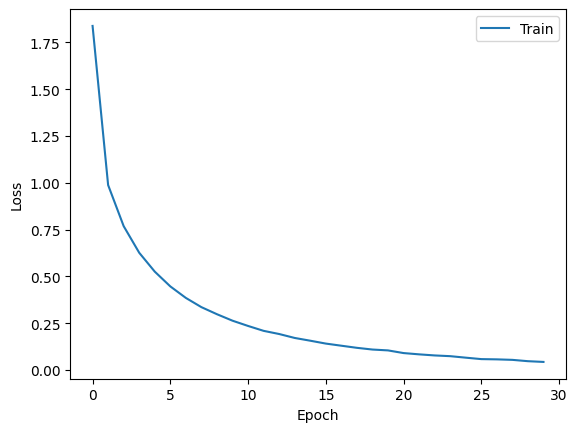

In [ ]:
plt.plot(train_history.history['loss'], label="Train")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

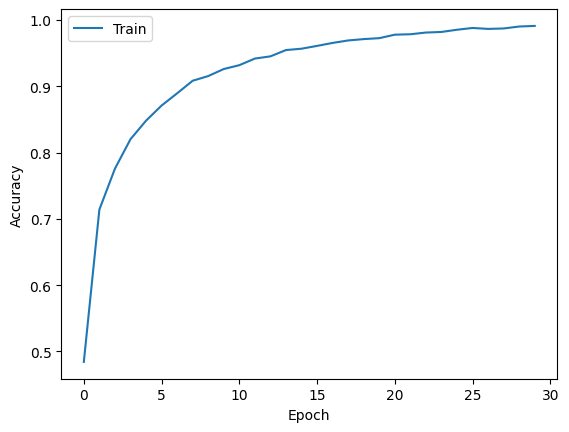

In [ ]:
plt.plot(train_history.history['accuracy'], label="Train")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(x=X_test, y=y_test)

69/69 [==============================] - 0s 2ms/step - loss: 0.1796 - accuracy: 0.9432


In [ ]:
pred = model.predict(X_test)

69/69 [==============================] - 0s 1ms/step


In [ ]:
y_pred=[]
for y in pred:
  y_pred.append(np.argmax(y))

In [ ]:
y_pred = np.array(y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        86
           1       0.95      0.90      0.92        87
           2       0.99      0.92      0.95        83
           3       0.93      0.98      0.95        85
           4       0.92      0.94      0.93        88
           5       0.99      0.93      0.96        83
           6       0.85      0.93      0.89        81
           7       0.99      0.86      0.92        90
           8       0.88      0.95      0.92        80
           9       0.96      0.91      0.93        86
          10       0.94      0.99      0.96        81
          11       0.95      0.95      0.95        83
          12       0.97      0.99      0.98        90
          13       0.94      0.96      0.95        82
          14       0.93      0.94      0.93        84
          15       0.97      0.97      0.97        90
          16       0.96      0.91      0.94        81
          17       0.82    

In [ ]:
import pandas as pd
import io

# 取得資料集
df_predict = pd.read_csv("letter_predict.csv")
print('資料的形式:{}'.format(df_predict.shape))
print('遺漏的數量:{}'.format(df_predict.isnull().sum().sum()))
df_predict.head()

資料的形式:(10000, 16)
遺漏的數量:0


,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,6,9,9,7,6,8,8,4,1,7,9,8,7,11,0,8
1,2,9,3,7,1,12,2,10,4,13,6,13,1,6,0,8
2,5,10,5,5,4,7,7,4,6,8,5,7,5,10,6,6
3,1,3,2,1,1,8,7,5,3,9,6,8,2,8,2,8
4,1,0,2,1,1,8,7,6,4,6,6,9,2,8,3,8


In [ ]:
# 正規化屬性數值
X_predict=df_predict
scaler=StandardScaler()
X_predict=scaler.fit_transform(X_predict)
prediction = np.argmax(model.predict(X_predict), axis=1)


313/313 [==============================] - 1s 2ms/step


In [ ]:
#將結果寫入 csv 檔

with open("predict.csv", 'w') as f:
    f.write('id,Class\n')
    for i, y in  enumerate(prediction):
        f.write('{},{}\n'.format(i,chr(y+97).upper()))